In [56]:
import pandas as pd
import fileinput
import json

In [57]:
output_path = "output/"

In [58]:
game_data = "data/game_worldfootball_rev.jl"

In [59]:
game = pd.DataFrame()
with fileinput.input(files=game_data) as file:
    for line in file:
        conv = json.loads(line)
        game = game.append(conv, ignore_index=True)
game.head()

,season,round,date,home_team,away_team,score,home_team_url,away_team_url,goal_player,goal_player_url,...,home_team_manager_url,away_team_manager,away_team_manager_url,stadium,stadium_country,stadium_url,refree_name,refree_country,refree_url,num_audience
0,2009/2010,5,13/09/2009,Birmingham City,Aston Villa,0:1,https://www.worldfootball.net/teams/birmingham...,https://www.worldfootball.net/teams/aston-villa/,"[Gabriel Agbonlahor, John Carew]",[https://www.worldfootball.net/player_summary/...,...,https://www.worldfootball.net/player_summary/a...,Martin O'Neill,https://www.worldfootball.net/player_summary/m...,St Andrew's Ground,Birmingham / England,https://www.worldfootball.net/venues/st-andrew...,Howard Webb,England,https://www.worldfootball.net/referee_summary/...,25196
1,2009/2010,5,13/09/2009,Fulham FC,Everton FC,2:1,https://www.worldfootball.net/teams/fulham-fc/,https://www.worldfootball.net/teams/everton-fc/,"[Tim Cahill, Leighton Baines, Paul Konchesky, ...",[https://www.worldfootball.net/player_summary/...,...,https://www.worldfootball.net/player_summary/r...,David Moyes,https://www.worldfootball.net/player_summary/d...,Craven Cottage,London / England,https://www.worldfootball.net/venues/craven-co...,Peter Walton,England,https://www.worldfootball.net/referee_summary/...,24191
2,2009/2010,5,12/09/2009,Tottenham Hotspur,Manchester United,1:3,https://www.worldfootball.net/teams/tottenham-...,https://www.worldfootball.net/teams/manchester...,"[Jermain Defoe, Peter Crouch, Ryan Giggs, Ande...",[https://www.worldfootball.net/player_summary/...,...,https://www.worldfootball.net/player_summary/h...,Alex Ferguson,https://www.worldfootball.net/player_summary/a...,White Hart Lane,London / England,https://www.worldfootball.net/venues/white-har...,Andre Marriner,England,https://www.worldfootball.net/referee_summary/...,35785
3,2009/2010,9,17/10/2009,Aston Villa,Chelsea FC,2:1,https://www.worldfootball.net/teams/aston-villa/,https://www.worldfootball.net/teams/chelsea-fc/,"[Didier Drogba, Frank Lampard, Richard Dunne, ...",[https://www.worldfootball.net/player_summary/...,...,https://www.worldfootball.net/player_summary/m...,Carlo Ancelotti,https://www.worldfootball.net/player_summary/c...,Villa Park,Birmingham / England,https://www.worldfootball.net/venues/villa-par...,Kevin Friend,England,https://www.worldfootball.net/referee_summary/...,39047
4,2009/2010,5,12/09/2009,Sunderland AFC,Hull City,4:1,https://www.worldfootball.net/teams/sunderland...,https://www.worldfootball.net/teams/hull-city/,"[Darren Bent, Kamil Zayatte, Kamel Ghilas, And...",[https://www.worldfootball.net/player_summary/...,...,https://www.worldfootball.net/player_summary/s...,Phil Brown,https://www.worldfootball.net/player_summary/p...,Stadium of Light,Sunderland / England,https://www.worldfootball.net/venues/stadium-o...,Martin Atkinson,England,https://www.worldfootball.net/referee_summary/...,38997


In [60]:
game = game.drop_duplicates(subset = ["season","round",'date', 'home_team', 'away_team'])

In [61]:
game.columns

Index(['season', 'round', 'date', 'home_team', 'away_team', 'score',
       'home_team_url', 'away_team_url', 'goal_player', 'goal_player_url',
       'home_team_players', 'away_team_players', 'home_team_manager',
       'home_team_manager_url', 'away_team_manager', 'away_team_manager_url',
       'stadium', 'stadium_country', 'stadium_url', 'refree_name',
       'refree_country', 'refree_url', 'num_audience'],
      dtype='object')

In [62]:
tot_player_url = []
for players in game["home_team_players"]:
    for player in players:
        tot_player_url.append(player['player_url'])
for players in game["away_team_players"]:
    for player in players:
        tot_player_url.append(player['player_url'])
tot_player_url = list(set(tot_player_url))

In [63]:
player2id = dict()
for idx, player in enumerate(tot_player_url):
    player2id[player] = idx

In [64]:
player2id

{'https://www.worldfootball.net/player_summary/ricardo-vaz-te/': 0,
 'https://www.worldfootball.net/player_summary/adam-matthews/': 1,
 'https://www.worldfootball.net/player_summary/adam-reed/': 2,
 'https://www.worldfootball.net/player_summary/modibo-maiga/': 3,
 'https://www.worldfootball.net/player_summary/gervinho/': 4,
 'https://www.worldfootball.net/player_summary/filip-krovinovic/': 5,
 'https://www.worldfootball.net/player_summary/jaden-philogene-bidace/': 6,
 'https://www.worldfootball.net/player_summary/danny-pugh/': 7,
 'https://www.worldfootball.net/player_summary/angel-rangel/': 8,
 'https://www.worldfootball.net/player_summary/anthony-knockaert/': 9,
 'https://www.worldfootball.net/player_summary/marcos-angeleri/': 10,
 'https://www.worldfootball.net/player_summary/joe-gelhardt/': 11,
 'https://www.worldfootball.net/player_summary/nadir-belhadj/': 12,
 'https://www.worldfootball.net/player_summary/andre-bikey/': 13,
 'https://www.worldfootball.net/player_summary/george-ba

In [65]:
def f(x):
    res = []
    for player in x:
        res.append(player2id[player['player_url']]+ 39)
    return res

game["home_team_player_ids"] = game["home_team_players"].apply(lambda x : f(x))
game["away_team_player_ids"] = game["away_team_players"].apply(lambda x : f(x))

In [66]:
df = game[["season", "date","round", "home_team", "away_team", 'score', 'home_team_player_ids', "away_team_player_ids"]]

In [67]:
df

,season,date,round,home_team,away_team,score,home_team_player_ids,away_team_player_ids
0,2009/2010,13/09/2009,5,Birmingham City,Aston Villa,0:1,"[1933, 1378, 2663, 723, 516, 2545, 368, 989, 5...","[2061, 1359, 269, 1356, 1822, 1291, 1560, 2181..."
1,2009/2010,13/09/2009,5,Fulham FC,Everton FC,2:1,"[1111, 1266, 2028, 141, 2454, 1483, 1612, 2500...","[2179, 1405, 1506, 2355, 2015, 739, 1188, 2428..."
2,2009/2010,12/09/2009,5,Tottenham Hotspur,Manchester United,1:3,"[2460, 1113, 1931, 2075, 715, 182, 2219, 115, ...","[962, 208, 491, 780, 1230, 2296, 1325, 1243, 1..."
3,2009/2010,17/10/2009,9,Aston Villa,Chelsea FC,2:1,"[2061, 1359, 269, 1356, 1822, 1291, 1560, 2181...","[564, 1184, 1963, 970, 2436, 1342, 680, 1109, ..."
4,2009/2010,12/09/2009,5,Sunderland AFC,Hull City,4:1,"[2205, 1391, 1363, 649, 1550, 1409, 1018, 1841...","[1850, 530, 1402, 2739, 1251, 876, 1166, 1597,..."
...,...,...,...,...,...,...,...,...
4601,2021/2022,25/09/2021,6,Leeds United,West Ham United,1:2,"[2030, 1576, 328, 2273, 713, 996, 526, 660, 98...","[1169, 430, 1064, 632, 2016, 1672, 1147, 2092,..."
4602,2021/2022,25/09/2021,6,Leicester City,Burnley FC,2:2,"[1773, 2101, 1716, 769, 493, 2308, 1914, 1190,...","[1512, 60, 945, 1308, 1656, 2199, 2299, 2311, ..."
4603,2021/2022,25/09/2021,6,Watford FC,Newcastle United,1:1,"[962, 767, 2105, 1840, 1065, 718, 320, 1314, 1...","[2366, 375, 402, 2521, 1161, 703, 2438, 1936, ..."
4604,2021/2022,25/09/2021,6,Brentford FC,Liverpool FC,3:3,"[546, 2612, 286, 507, 612, 1581, 2340, 292, 31...","[705, 456, 2077, 119, 1787, 834, 1340, 1309, 1..."


In [68]:
df["time"] = df.apply(lambda x : x.season + str(int(x["round"]) + 100), axis = 1)

/Users/jaeyoungkim/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df = df.sort_values("time")

In [70]:
totimestamp = dict()
for idx, i in enumerate(df["time"].drop_duplicates()):
    totimestamp[i] = idx

In [71]:
df["timestamp"] = df["time"].apply(lambda x : totimestamp[x])

In [72]:
team_list = list(df["home_team"].append(df["away_team"]).drop_duplicates())

In [73]:
score_list = list(df["score"].drop_duplicates())

In [74]:
relation_list = ["win", "lose", "draw", "home_team_player", "away_team_player"]
# key_list = ["home_team_players", "score", "away_team_players"]

In [75]:
entity2id = dict()
relation2id = dict()
score2id = dict()
key2id = dict()

In [76]:
for idx, i in enumerate(team_list):
    entity2id[i] = idx
for idx, i in enumerate(relation_list):
    relation2id[i] = idx
for idx, i in enumerate(score_list):
    score2id[i] = idx
# for idx, i in enumerate(key_list):
#     key2id[i] = idx  
    

In [77]:
def f(x):
    s1, s2 = x.split(":")
    if s1 > s2:
        return "win"
    elif s1 == s2:
        return "draw"
    elif s1 < s2:
        return "lose"


df["node1"] = df["home_team"].apply(lambda x : entity2id[x])
df["label"] = df["score"].apply(lambda x : relation2id[f(x)])
df["node2"] = df["away_team"].apply(lambda x : entity2id[x])

In [78]:
df["k1"] = "home_team_player"
df["k3"] = "away_team_player"
# df["k2"] = "score"
# df["score"] = df["score"].apply(lambda x : [int(x.split(":")[0]),int(x.split(":")[1])])
df["k1"] = df["k1"].apply(lambda x : relation2id[x])
# df["k2"] = df["k2"].apply(lambda x : relation2id[x])
df["k3"] = df["k3"].apply(lambda x : relation2id[x])

In [79]:
# tkg_df = df[['node1', 'label', 'node2', 'timestamp', 'k1', 'home_team_player_ids', 'k2', 'score', 'k3', 'away_team_player_ids']]
# tkg_df

In [80]:
tkg_df = df[["node1", "label", "node2", "timestamp", "date", "home_team_player_ids", "away_team_player_ids"]]

In [81]:
tkg_df

,node1,label,node2,timestamp,date,home_team_player_ids,away_team_player_ids
206,0,1,17,0,15/08/2009,"[1323, 1339, 568, 514, 1359, 1949, 2614, 1379,...","[893, 1740, 2395, 269, 2562, 1757, 400, 1688, ..."
208,1,1,13,0,15/08/2009,"[2061, 234, 2482, 2113, 1356, 1560, 2181, 2504...","[2165, 2764, 222, 691, 784, 1212, 1119, 1921, ..."
205,2,1,10,0,15/08/2009,"[2529, 1328, 443, 1246, 1398, 66, 120, 732, 25...","[1357, 1391, 221, 649, 2662, 1550, 1409, 1018,..."
204,3,0,19,0,15/08/2009,"[130, 1832, 2652, 2724, 2624, 321, 2632, 1374,...","[1492, 1974, 2648, 735, 562, 1862, 1920, 352, ..."
203,4,1,11,0,15/08/2009,"[2179, 1405, 1506, 2355, 1138, 739, 1188, 2428...","[1783, 1032, 1943, 1268, 2626, 1489, 465, 463,..."
...,...,...,...,...,...,...,...
4470,16,0,22,472,16/12/2021,"[705, 1747, 2077, 119, 1787, 1711, 1340, 2264,...","[1809, 2462, 2177, 998, 1161, 1571, 703, 1453,..."
4478,6,2,7,473,19/12/2021,"[2052, 1419, 2421, 1157, 390, 2690, 2359, 1467...","[268, 719, 468, 1556, 2322, 1055, 2707, 2749, ..."
4479,8,2,16,473,19/12/2021,"[2272, 1854, 817, 1305, 1241, 2696, 1463, 683,...","[705, 1747, 2077, 119, 1787, 2181, 863, 1796, ..."
4480,22,1,17,473,19/12/2021,"[1809, 375, 2177, 402, 703, 2438, 1936, 1453, ...","[139, 2229, 644, 781, 1760, 117, 1386, 1848, 9..."


In [82]:
relation2id

{'win': 0, 'lose': 1, 'draw': 2, 'home_team_player': 3, 'away_team_player': 4}

In [83]:
entity_desc = '''Blackburn Rovers	0	Blackburn Rovers Football Club is a professional football club, based in Blackburn, Lancashire, England, which competes in the EFL Championship, the second tier of the English football league system. The club was established in 1875, becoming a founding member of The Football League in 1888 and the Premier League in 1992. In 1890, Rovers moved to Ewood Park. Blackburn Rovers have been English champions three times, and have won six FA Cups, one Football League Cup and one Full Members\' Cup. The club has spent most of its existence in the top flight of English football.In 1992, Rovers gained promotion to the new Premier League a year after being taken over by local entrepreneur Jack Walker, who installed Kenny Dalglish as manager. In 1995, Rovers became Premier League champions. In the 1998–99 season, the club was relegated. It was promoted back to the Premier League two years later, in the 2000–01 season, before suffering relegation again in the 2011–12 season. Rovers have not returned to the Premier League since. It has qualified for the UEFA Champions League once, and the UEFA Cup six times: once as League Cup winners, four times through league position and once via the Intertoto Cup. The club\'s motto is "Arte et Labore", meaning "By Skill and Hard Work" in Latin. They have a long-standing rivalry with nearby club Burnley, with whom they contest the East Lancashire derby.
Aston Villa	1	Aston Villa Football Club is an English professional football club based in Aston, Birmingham. The club competes in the Premier League, the top tier of the English football league system. Founded in 1874, they have played at their home ground, Villa Park, since 1897. Aston Villa were one of the founder members of the Football League in 1888 and of the Premier League in 1992. Villa are one of the five English clubs to have won the European Cup, in 1981–82. They have also won the Football League First Division seven times, the FA Cup seven times, the League Cup five times, and the European (UEFA) Super Cup once. The club are currently ranked 5th in the all-time English top flight table, since its creation in 1888.Villa have a fierce local rivalry with Birmingham City and the Second City derby between the teams has been played since 1879. The club's traditional kit colours are claret shirts with sky blue sleeves, white shorts and sky blue socks. Their traditional club badge is of a rampant lion. The club is currently owned by the NSWE group, a company owned by the Egyptian billionaire Nassef Sawiris and the American billionaire Wes Edens.
Bolton Wanderers	2	Bolton Wanderers Football Club is a professional football club based in Horwich, England, which competes in EFL League One, the third tier of English football. Formed as Christ Church Football Club in 1874, it adopted its current name in 1877 and was a founder member of the Football League in 1888. Bolton have spent more seasons, 73, than any other club in the top flight without winning the title. They finished third in the First Division in 1891–92, 1920–21 and 1924–25. Bolton won the FA Cup three times in the 1920s, and again in 1958. The club spent a season in the Fourth Division in 1987–88, before regaining top-flight status in 1995 and qualifying for the UEFA Cup twice; reaching the last 32 in 2005–06 and the last 16 in 2007–08. The club played at Burnden Park for 102 years from 1895. On 9 March 1946, thirty-three Bolton fans lost their lives in a human crush, the Burnden Park disaster. In 1997, Bolton moved to the Reebok Stadium. The stadium was renamed the Macron Stadium in 2014 and University of Bolton Stadium in 2018. Beginning in 2015, Bolton had been in severe financial difficulties, and went into administration in May 2019. Facing possible EFL expulsion and probable extinction, the club was acquired by new owners on 28 August 2019.
Stoke City	3	Stoke City Football Club is an English professional football club based in Stoke-on-Trent, Staffordshire. Founded as Stoke Ramblers in 1863, the club changed its name to Stoke Football Club in 1878 and then to Stoke City in 1925 after Stoke-on-Trent was granted city status. Stoke were one of the twelve founding members of the Football League in 1888. The team competes in the Championship, the second tier of English football. Their first, and only major trophy to date, the League Cup was won in 1972, when the team beat Chelsea 2–1. The club's highest league finish in the top division is fourth, which was achieved in the 1935–36 and 1946–47 seasons. Stoke played in the FA Cup Final in 2011, finishing runners-up to Manchester City and have reached three FA Cup semi-finals; in 1899 then consecutively in 1971 and 1972. Stoke have competed in European football on three occasions, firstly in 1972–73 then in 1974–75 and most recently in 2011–12. The club has won the Football League Trophy twice, in 1992 and in 2000. Stoke's home ground is the 30,089 all-seater, Bet365 Stadium. Before the stadium was opened in 1997, the club was based at the Victoria Ground, which had been their home ground since 1878. The club's nickname is 'The Potters', named after the pottery industry in Stoke-on-Trent and their traditional home kit is a red and white vertically striped shirt, white shorts and stockings. Stoke's traditional rivals are Midlands clubs West Bromwich Albion and Wolverhampton Wanderers whilst their local rivals are Port Vale with whom they contest the Potteries derby.
Everton FC	4	Everton Football Club is an English professional association football club based in Liverpool that currently competes in the Premier League, the top tier of English football. The club was a founder member of the Football League in 1888 and has competed in the top division for a record 118 seasons, having missed only four top-flight seasons (1930–31, 1951–52, 1952–53 and 1953–54). Everton is the second-longest continuous serving club in English top flight football and ranks third in the all-time points rankings. The club has won nine league titles, five FA Cups, one European Cup Winners\' Cup and nine Charity Shields. Formed in 1878, Everton won their first League Championship during the 1890–91 season. After winning four more League championships and two FA Cups, the club experienced a post-World War II lull until a revival in the 1960s. A period of sustained success came in the mid-1980s, when Everton won a further two League championships, one FA Cup, and the 1985 European Cup Winners\' Cup. The club\'s most recent major trophy was the 1995 FA Cup. The club\'s supporters are colloquially known as "Evertonians" or "Blues". Everton\'s main rivals are Liverpool, whose home stadium at Anfield is just under one mile away from Everton\'s home at Goodison Park; the two clubs contest the Merseyside derby. Everton have been based at Goodison Park since 1892, having moved from their original home at Anfield following a disagreement over its rent. The club\'s home colours are royal blue shirts with white shorts and socks.
Portsmouth FC	5	Portsmouth Football Club is an English professional association football club in Portsmouth, Hampshire. The team compete in EFL League One, the third tier of the English football league system. The club was founded on 5 April 1898 and home matches are played at Fratton Park, their original home ground which was first opened on 15 August 1899. Portsmouth are also known as Pompey, the local nickname for both the city of Portsmouth and HMNB Portsmouth.Portsmouth have been the top tier League Champions of England twice; in the consecutive 1948–49 and 1949–50 seasons. Portsmouth have won the FA Cup twice; in 1939 and 2008, the FA Charity Shield once in 1949 and the EFL Trophy once in 2019. They have also won the second tier title once in 2002–03, the third tier three times in 1923–24 (South), 1961–62, 1982–83 and the fourth tier once in 2016–17. By winning the League Two title in 2017, Portsmouth became only the fifth English football club to win all four tiers of current English professional football. In addition, Portsmouth are also one of only two English football clubs (along with Wolverhampton Wanderers) to have been champions of five professional divisions including the former regional Football League Third Division South championship in the 1923–24 season. Before their election into the Football League in 1920, Portsmouth were champions of the regional Southern Football League in 1901–02 and 1919–20, and the Western Football League in 1900–01, 1901–02 and 1902–03. After earning promotion from the Second Division in the 1926–27 season, Portsmouth became the first football club south of London to reach the First Division, the top tier of professional English football. They also became the first club in the Football League to gain promotion through three professional divisions; from the Third Division (1920–21 to 1923–24 (South)), to the Second Division (1924–25 to 1926–27) and reaching the First Division for the 1927–28 season. Portsmouth remained in the First Division for a further 32 years until relegation to the Second Division at the end of the 1958–59 season. Their most recent period in the top tier was between 2003 and 2010, when they also participated in the 2008–09 UEFA Cup, Portsmouth's only appearance in European competition. The club's fortunes declined between 2010 and 2013 when the club entered financial administration twice and were relegated three times, dropping to the fourth tier and their lowest point since the 1979–80 season. The club were saved in 2013 from High Court liquidation after being bought out by the fan-owned Pompey Supporters Trust (PST) on 10 April 2013. This made Portsmouth the largest fan-owned football club in England until 3 August 2017, when the PST sold it to The Tornante Company, an investment company owned by former Disney CEO Michael Eisner.
Wolverhampton Wanderers	6	Wolverhampton Wanderers Football Club, commonly known as Wolves, is a professional association football club based in Wolverhampton, England. Formed as St. Luke\'s F.C. in 1877, the club has played at Molineux Stadium since 1889 and has been competing in the Premier League, the top division of English football, since winning promotion in 2018. The 2021–22 season is the club\'s 67th season in total at the highest level and the eighth since the foundation of the Premier League in 1992. The club was one of the founding members of the Football League in 1888. During 26 consecutive seasons spent in the top flight between 1932 and 1965, the team was crowned English League champions three times (in 1953–54, 1957–58 and 1958–59), all under the management of Stan Cullis. Wolves also finished English League runners-up in five other seasons between 1937–38 and 1959–60. Wolves has won the FA Cup four times, most recently in 1960, and finished runners-up on a further four occasions. The club has also won the League Cup twice, in 1974 and 1980, and finished top of all four divisions in the English professional game. After becoming one of the first British clubs to install floodlights at its home ground, Wolves arranged televised "floodlit friendlies" against leading overseas club sides between 1953 and 1956, which were instrumental in the launch of the European Cup (now known as the UEFA Champions League) in 1955. Wolves reached the quarter-finals of the competition in 1959–60 as well as the semi-finals of the 1960–61 European Cup Winners\' Cup and the inaugural UEFA Cup Final in 1972. Following a 39-year absence from European competition, they reached the UEFA Europa League quarter-finals in 2020. Wolves\' traditional kit consists of old gold shirts and socks with black shorts. Since 1979, the kit has also featured the club\'s "wolf\'s head" logo. Long-standing rivalries exist with other clubs from the West Midlands, the main one being the Black Country derby contested with West Bromwich Albion. The two clubs most recently faced off during the 2020–21 season for the first time since 2011–12, with the match on 16 January 2021 coming nearly nine years after the previous meeting on 12 February 2012.
Chelsea FC	7	Chelsea Football Club is an English professional football club based in Fulham, West London. Founded in 1905, the club competes in the Premier League, the top division of English football. Chelsea are among England's most successful clubs, having won over thirty competitive honours, including six League titles and nine international trophies. Their home ground is Stamford Bridge.Chelsea won their first major honour, the League championship, in 1955. The club won the FA Cup for the first time in 1970 and their first European honour, the Cup Winners' Cup, in 1971. After a period of decline in the late 1970s and 1980s, the club enjoyed a revival in the 1990s, enjoying more success in several cup competitions. The past twenty-five years have been the most successful in Chelsea's history: they have won five Premier League titles, seven FA Cups, four League Cups, two UEFA Champions League titles, two UEFA Europa League titles, two UEFA Super Cups, and one FIFA Club World Cup during this period. Chelsea are one of five clubs to have won all three of UEFA's main club competitions, being the first English club to achieve the UEFA treble. They are also the only London club to have won the Champions League and the Club World Cup, and the only club to have won all three major European competitions twice.Chelsea's home kit colours are royal blue shirts and shorts with white socks. The club's crest features a ceremonial lion rampant regardant holding a staff. The club has rivalries with neighbouring teams Arsenal and Tottenham Hotspur, and a historic rivalry with Leeds United. Based on attendance figures, the club has the sixth-largest fanbase in England. In terms of club value, Chelsea are the seventh most valuable football club in the world (As of 2021), worth £2.39 billion ($3.2 billion), and are the eighth highest-earning football club in the world, with earnings of over €428 million in the 2017–18 season. Since 2003, Chelsea have been owned by Russian-Israeli billionaire Roman Abramovich.
Tottenham Hotspur	8	Tottenham Hotspur Football Club, commonly referred to as Tottenham or Spurs, is an English professional football club based in Tottenham, London, that competes in the Premier League, the top flight of English football. The team has played its home matches in the 62,850-capacity Tottenham Hotspur Stadium since April 2019, replacing their former home of White Hart Lane, which had been demolished to make way for the new stadium on the same site. Founded in 1882, Tottenham\'s emblem is a cockerel standing upon a football, with the Latin motto Audere est Facere ("to dare is to do"). The club has traditionally worn white shirts and navy blue shorts home kit since the 1898–99 season. Their training ground is on Hotspur Way in Bulls Cross in the London Borough of Enfield. After its inception, Tottenham won the FA Cup for the first time in 1901, the only non-League club to do so since the formation of the Football League in 1888. Tottenham were the first club in the 20th century to achieve the League and FA Cup Double, winning both competitions in the 1960–61 season. After successfully defending the FA Cup in 1962, in 1963 they became the first British club to win a UEFA club competition – the European Cup Winners\' Cup. They were also the inaugural winners of the UEFA Cup in 1972, becoming the first British club to win two different major European trophies. They collected at least one major trophy in each of the six decades from the 1950s to 2000s – an achievement only matched by Manchester United.In domestic football, Spurs have won two league titles, eight FA Cups, four League Cups, and seven FA Community Shields. In European football, they have won one European Cup Winners\' Cup and two UEFA Cups. Tottenham were also runners-up in the 2018–19 UEFA Champions League. They have a long-standing rivalry with nearby club Arsenal, with whom they contest the North London derby. Tottenham is owned by ENIC Group, which purchased the club in 2001. The club was estimated to be worth £1.67 billion ($2.3 billion) in 2021, and it was the ninth highest-earning football club in the world, with an annual revenue of £390.9 million in 2020.
Manchester United	9	Manchester United Football Club is a professional football club based in Old Trafford, Greater Manchester, England, that competes in the Premier League, the top flight of English football. Nicknamed "the Red Devils", the club was founded as Newton Heath LYR Football Club in 1878, but changed its name to Manchester United in 1902. The club moved from Newton Heath to its current stadium, Old Trafford, in 1910. Manchester United have won the most trophies in English club football, including a record 20 League titles, 12 FA Cups, five League Cups and a record 21 FA Community Shields. They have won the European Cup/UEFA Champions League three times, and the UEFA Europa League, the UEFA Cup Winners\' Cup, the UEFA Super Cup, the Intercontinental Cup and the FIFA Club World Cup once each. In 1968, under the management of Matt Busby, 10 years after eight of the club\'s players were killed in the Munich air disaster, they became the first English club to win the European Cup. Alex Ferguson is the club\'s longest-serving and most successful manager, winning 38 trophies, including 13 league titles, 5 FA Cups and 2 UEFA Champions League titles, between 1986 and 2013. In the 1998–99 season, under Ferguson, the club became the first in the history of English football to achieve the European treble of the Premier League, FA Cup and UEFA Champions League. In winning the UEFA Europa League under José Mourinho in 2016–17, they also became one of five clubs to have won the original three main UEFA club competitions (the Champions League, Europa League and Cup Winners\' Cup). Manchester United is one of the most widely supported football clubs in the world, and has rivalries with Liverpool, Manchester City, Arsenal and Leeds United. Manchester United was the highest-earning football club in the world for 2016–17, with an annual revenue of €676.3 million, and the world\'s third most valuable football club in 2019, valued at £3.15 billion ($3.81 billion). After being floated on the London Stock Exchange in 1991, the club was taken private in 2005 after a purchase by Malcolm Glazer valued at almost £800 million, of which over £500 million of borrowed money became the club\'s debt. From 2012, some shares of the club were listed on the New York Stock Exchange, although the Glazer family retains overall ownership and control of the club.
Sunderland AFC	10	Sunderland Association Football Club ( (listen), locally ) is an English professional football club based in the city of Sunderland, Tyne and Wear. Sunderland plays in League One, the third tier of English football. Since its formation in 1879, the club has won six top-flight (First Division, now the Premier League) titles (1892, 1893, 1895, 1902, 1913, and 1936), and has finished runners-up five times. The club has also won the FA Cup twice (1937 and 1973) and been runners-up twice (1913 and 1992), as well as winning the FA Charity Shield in 1936 and being finalists the following year. Sunderland have also been Football League Cup finalists in 1985 and 2014. Sunderland play their home games at the 49,000-capacity all-seater Stadium of Light having moved from Roker Park in 1997. The original ground capacity was 42,000 which was increased to 49,000 following expansion in 2000. The club have a long-standing rivalry with nearby club Newcastle United, with whom they have contested the Tyne–Wear derby since 1898. The club have played in red and white-striped shirts and black shorts for nearly the entirety of its history.
Arsenal FC	11	Arsenal Football Club is a professional football club based in Islington, London, England. Arsenal plays in the Premier League, the top flight of English football. The club has won 13 league titles (including one unbeaten title), a record 14 FA Cups, two League Cups, 16 FA Community Shields, the League Centenary Trophy, one European Cup Winners\' Cup, and one Inter-Cities Fairs Cup. Arsenal was the first club from the South of England to join the Football League in 1893, and they reached the First Division in 1904. Relegated only once, in 1913, they continue the longest streak in the top division, and have won the second-most top-flight matches in English football history. In the 1930s, Arsenal won five League Championships and two FA Cups, and another FA Cup and two Championships after the war. In 1970–71, they won their first League and FA Cup Double. Between 1989 and 2005, they won five League titles and five FA Cups, including two more Doubles. They completed the 20th century with the highest average league position. Between 1998 and 2017, Arsenal qualified for the UEFA Champions League for 19 straight seasons.Herbert Chapman, who changed the fortunes of Arsenal forever, won the club its first silverware, and his legacy led the club to dominate the 1930s decade; Chapman, however, died of pneumonia in 1934, aged 55. He helped introduce the WM formation, floodlights, and shirt numbers; he also added the white sleeves and brighter red to the club\'s jersey. Arsène Wenger is the longest-serving manager and won the most trophies. He won a record seven FA Cups, and his title-winning team set an English record for the longest top-flight unbeaten league run at 49 games between 2003 and 2004, receiving the nickname The Invincibles. In 1886, munitions workers at the Royal Arsenal in Woolwich founded the club as Dial Square. In 1913, after the destruction of their South London stadium by suffragettes, the club crossed the city to Arsenal Stadium in Highbury, becoming close neighbours of Tottenham Hotspur, and creating the North London derby. In 2006, they moved to the nearby Emirates Stadium. With an annual revenue of £340.3m in the 2019–20 season, Arsenal was estimated to be worth US$2.68 billion by Forbes, making it the world\'s eighth most valuable club, while it is one of the most followed on social media. The motto of the club has long been Victoria Concordia Crescit, Latin for "Victory Through Harmony".
Fulham FC	12	Fulham Football Club is an English professional association football club based in Fulham, London. They currently compete in the Championship, the second tier of the English football league system. Founded in 1879, they are London's oldest football club playing professionally.The club has spent 27 seasons in English football's top division, the majority of which have come in two periods during the 1960s and 2000s. The latter period was associated with former chairman Mohamed Al-Fayed, after the club had climbed up from the fourth tier in the 1990s. Fulham have reached two major finals: in 1975 they lost 2–0 against West Ham United in the FA Cup Final as a Second Division team, and in 2010 they played Atlético Madrid in the UEFA Europa League Final, losing 2–1 after extra time. Fulham's main rivalries are with fellow West London clubs Chelsea, Queens Park Rangers and Brentford. The club adopted a white shirt and black shorts as its kit in 1903, which has been used ever since.
Wigan Athletic	13	Wigan Athletic Football Club is an English professional association football club based in Wigan, Greater Manchester, England. The team competes in League One, the third tier of the English football league system. Founded in 1932, they have played at the 25,138-seat DW Stadium since 1999, before which they played at Springfield Park. Their colours are blue and white stripes, although all-blue shirts have been common throughout the club's history. The club regards Bolton Wanderers as its primary derby rival. Wigan competed in the Cheshire County League for the first nine seasons of the club's existence, winning three league titles before being placed in the Lancashire Combination in 1947. It spent 14 years in the Lancashire Combination and secured four league titles during this time. It spent 1961 to 1968 back in the Cheshire County League, picking up another league title in 1964–65. Invited to become a founder member of the Northern Premier League in 1968, the club won two league titles and also reached the FA Trophy final in 1973. Wigan was elected to the Football League in 1978 and was promoted out of the Fourth Division in 1981–82. The club won the Associate Members' Cup in 1985, but was relegated back into the fourth tier in 1993. It won the Third Division title in 1996–97, the Football League Trophy in 1999 and the Second Division in 2002–03, before securing promotion out of the Championship in 2004–05. Wigan was the beaten finalist in the League Cup in 2006 and won the FA Cup in 2013, beating Manchester City in the final. However, the club was relegated later that year, bringing its eight-season stay in the Premier League to an end. The FA Cup success did, though, gain it a place in the UEFA Europa League group stages the following season. Relegated from the Championship in 2015, the club won the League One title in 2015–16 and repeated this feat in 2017–18 after another relegation. On 1 July 2020, less than a month after a change of ownership, it was placed into administration and was relegated from the Championship due to the subsequent points deduction.
West Ham United	14	West Ham United Football Club is an English professional football club based in Stratford, East London that compete in the Premier League, the top tier of English football. The club plays at the London Stadium, having moved from their former home, the Boleyn Ground, in 2016. The club was founded in 1895 as Thames Ironworks and reformed in 1900 as West Ham United. They moved to the Boleyn Ground in 1904, which remained their home ground for more than a century. The team initially competed in the Southern League and Western League before joining the Football League in 1919. They were promoted to the top flight in 1923, when they were also losing finalists in the first FA Cup Final held at Wembley. In 1940, the club won the inaugural Football League War Cup. West Ham have been winners of the FA Cup three times; in 1964, 1975 and 1980, and have also been runners-up twice; in 1923 and 2006. The club have reached two major European finals, winning the European Cup Winners' Cup in 1965 and finishing runners-up in the same competition in 1976. West Ham also won the Intertoto Cup in 1999. They are one of eight clubs never to have fallen below the second tier of English football, spending 63 of 95 league seasons in the top flight, up to and including the 2020–21 season. The club's highest league position to date came in 1985–86, when they achieved third place in the then First Division. Three West Ham players were members of the 1966 World Cup final-winning England team: captain Bobby Moore and goalscorers Geoff Hurst and Martin Peters. The club has a long-standing rivalry with Millwall, and the fixture between the two teams has gained notoriety for frequent incidents of football hooliganism. West Ham adopted their claret and sky blue colour scheme in the early 1900s, with the most common iteration of a claret shirt and sky blue sleeves first emerging in 1904.
Hull City	15	Hull City Association Football Club is an English professional football club in Hull, East Riding of Yorkshire. Founded in 1904, the club competes in the Championship after winning the 2020–21 League One title. In 2007–08, they achieved promotion to the top flight of English football for the first time in their history by winning the Championship play-off final at Wembley Stadium. Their highest league finish was in 2013–14, when they finished 16th in the table, a season in which they also reached the final of the FA Cup.Hull City play home games at the MKM Stadium (previously known as the KCOM Stadium), having moved there in 2002 after 56 seasons at Boothferry Park. Hull traditionally play in black and amber, often with a striped shirt design, hence their nickname, The Tigers.
Liverpool FC	16	Liverpool Football Club is a professional football club based in Liverpool, England, that competes in the Premier League, the top tier of English football. Domestically, the club has won nineteen League titles, seven FA Cups, a record eight League Cups and fifteen FA Community Shields. In international competitions, the club has won six European Cups, more than any other English club, three UEFA Cups, four UEFA Super Cups, and one FIFA Club World Cup. Founded in 1892, the club joined the Football League the following year and has played at Anfield since its formation. Liverpool established itself as a major force in English and European football in the 1970s and 1980s, when Bill Shankly, Bob Paisley, Joe Fagan and Kenny Dalglish led the club to a combined eleven League titles and four European Cups. Liverpool won two further European Cups in 2005 and 2019 under the management of Rafael Benítez and Jürgen Klopp, respectively; the latter led Liverpool to a nineteenth League title in 2020, the club\'s first during the Premier League era. Liverpool is one of the most widely supported clubs in the world, as well as one of the most valuable. Liverpool has long-standing rivalries with Manchester United and Everton. In 1964 the team changed from red shirts and white shorts to an all-red home strip which has been used ever since. The club\'s anthem is "You\'ll Never Walk Alone". The club\'s supporters have been involved in two major tragedies. The Heysel Stadium disaster, where escaping fans were pressed against a collapsing wall at the 1985 European Cup Final in Brussels, resulted in 39 deaths. Most of these were Italians and Juventus fans, and English clubs were given a five-year ban from European competition as a result. The Hillsborough disaster in 1989, where 97 Liverpool supporters died in a crush against perimeter fencing, led to the elimination of fenced standing terraces in favour of all-seater stadiums in the top two tiers of English football.
Manchester City	17	Manchester City Football Club is an English football club based in Manchester that competes in the Premier League, the top flight of English football. Founded in 1880 as St. Mark's (West Gorton), it became Ardwick Association Football Club in 1887 and Manchester City in 1894. The club's home ground is the Etihad Stadium in east Manchester, to which it moved in 2003, having played at Maine Road since 1923. The club adopted their sky blue home shirts in 1894 in the first season of the club's current iteration, that have been used ever since. They are currently ranked 6th in the all-time English top flight table since its creation in 1888, thus making it one of the country's most successful football clubs. Manchester City entered the Football League in 1892, and won their first major honour with the FA Cup in 1904. The club had its first major period of success in the late 1960s, winning the League, European Cup Winners Cup, FA Cup and League Cup under the management of Joe Mercer and Malcolm Allison. After losing the 1981 FA Cup Final, the club went through a period of decline, culminating in relegation to the third tier of English football for the only time in its history in 1998. They since regained promotion to the top tier in 2001–02 and have remained a fixture in the Premier League since 2002–03. The club received considerable financial investment in both playing staff and club facilities following the club's takeover by Sheikh Mansour bin Zayed Al Nahyan through the Abu Dhabi United Group in 2008. This started a new era of achievement, with the club winning the FA Cup in 2011 and the Premier League in 2012, both their first since the 1960s, followed by another League in 2014. Under the management of Pep Guardiola City won the Premier League in 2018, becoming the only Premier League team to attain 100 points in a single season. In 2019, they won four trophies, completing an unprecedented sweep of all domestic trophies in England and becoming the first English men's team to win the domestic treble. In addition to winning the third Premier League title in the Guardiola era, City reached their first European Cup final in 2021, where they lost to Chelsea. Manchester City's revenue was the fifth highest of a football club in the world in the 2018–19 season at €568.4 million. In 2019, Forbes estimated the club was the fifth most valuable in the world at $2.69 billion, The club is owned by the City Football Group, a holding company valued at £3.73 (US$4.8) billion in November 2019. The Abu Dhabi United Group holds primary interest in the holding company.
Birmingham City	18	Birmingham City Football Club is a professional football club in Birmingham, England. Formed in 1875 as Small Heath Alliance, it was renamed Small Heath in 1888, Birmingham in 1905, and Birmingham City in 1943. Since 2011, the first team have competed in the EFL Championship, the second tier of English football. As Small Heath, they played in the Football Alliance before becoming founder members and first champions of the Football League Second Division. The most successful period in their history was in the 1950s and early 1960s. They achieved their highest finishing position of sixth in the First Division in the 1955–56 season and reached the 1956 FA Cup Final. Birmingham played in two Inter-Cities Fairs Cup finals, in 1960, as the first English club side to reach a major European final, and again the following year. They won the League Cup in 1963 and again in 2011. Birmingham have played in the top tier of English football for around half of their history: the longest period spent outside the top division, between 1986 and 2002, included two brief spells in the third tier of English football, during which time they won the Football League Trophy twice. St Andrew's has been their home ground since 1906. They have a long-standing and fierce rivalry with Aston Villa, their nearest neighbours, with whom they play the Second City derby. The club's nickname is Blues, after the colour of their kit, and the fans are known as Bluenoses.
Burnley FC	19	Burnley Football Club is an English association football club based in Burnley, Lancashire, that currently competes in the Premier League, the top tier of English football. Founded on 18 May 1882, it was one of the first to become professional (in 1883), and subsequently put pressure on the Football Association to permit payments to players. The club entered the FA Cup for the first time in 1885–86 and was one of the 12 founder members of the Football League in 1888–89. From the 1950s until the 1970s, under chairman Bob Lord, the club became renowned for its youth policy and scouting system, and was one of the first to set up a purpose-built training ground. Burnley have been champions of England twice, in 1920–21 and 1959–60, have won the FA Cup once, in 1913–14, and have won the FA Charity Shield twice, in 1960 and 1973. They have been runners-up in the First Division twice, in 1919–20 and 1961–62, and FA Cup runners-up twice, in 1946–47 and 1961–62. Burnley are one of only five sides to have won all four professional divisions of English football, along with Wolverhampton Wanderers, Preston North End, Sheffield United and Portsmouth. When the team won the 1959–60 Football League, the town of Burnley became one of the smallest to have an English first-tier champion.The team have played home games at Turf Moor since 1883, after they had moved from their original premises at Calder Vale. The club colours of claret and blue were adopted before the 1910–11 season in tribute to the then Football League champions Aston Villa. The club is nicknamed "the Clarets" because of the dominant colour of its home shirts. Burnley\'s current emblem is based on the town\'s coat of arms. The team have a long-standing rivalry with nearby club Blackburn Rovers, with whom they contest the East Lancashire Derby.
West Bromwich Albion	20	West Bromwich Albion Football Club , commonly referred to as West Brom, is an English professional football club based in West Bromwich, West Midlands, England. They compete in the EFL Championship, the second tier of English football. The club was formed in 1878 and has played at its home ground, The Hawthorns, since 1900. Albion was one of the 12 founding members of the Football League in 1888, the first professional football league in the world. The club has spent the majority of its existence in the top tier of English football, where as of 2020–21 it has played for 82 seasons. The club has been champions of England once, in 1919–20, and has been runners-up twice. Albion teams have reached ten FA Cup finals and won the Cup on five occasions. The first win came in 1888, the year the league was founded, and the most recent in 1968, the club's last major trophy. It also won the Football League Cup at the first attempt in 1966. The club's longest continuous period in the top division spanned 24 years between 1949 and 1973, and from 1986 to 2002 it spent its longest ever spell out of the top division. The team has played in navy blue and white stripes for most of the club's history, and the club badge features a throstle perched on a hawthorn branch. Albion has a number of long-standing rivalries with other West Midlands clubs, with its traditional rivals being Aston Villa and Wolves. Albion contests the Black Country derby with the latter.
Blackpool FC	21	Blackpool Football Club is a professional association football club based in the seaside town of Blackpool, Lancashire, England. The team is competing in the Championship, the second tier of the English football league system, in 2021–22, having gained promotion from League One in 2020–21. Founded in 1887, the club played home games at Raikes Hall and the Athletic Grounds before moving to Bloomfield Road in 1901. The club were founder members of the Lancashire League in 1889 and were invited into the Football League Second Division in 1896. They failed re-election in 1899 but had their Football League membership reinstated the following year. Blackpool remained in the Second Division until they won the league title in 1929–30, though they were relegated after three seasons in the First Division. Promoted again in 1936–37, the club entered a golden period under the stewardship of long-time manager Joe Smith. Blackpool lost the 1948 and 1951 FA Cup finals before winning the competition in 1953, in the so-called "Matthews Final", in which they beat Bolton Wanderers 4–3, overturning a 3–1 deficit in the closing stages of the game. That same year, four Blackpool players were in the England team which lost against Hungary at Wembley. In the 1950s they had four top-six finishes in the First Division, with their best position being runners-up to Manchester United in 1955–56. In 1956, Stanley Matthews was the inaugural recipient of the Ballon d\'Or.Blackpool were relegated out of the First Division in 1967 and again in 1971 after winning promotion in 1969–70. They dropped into the fourth tier after suffering relegations in 1978 and 1981, then gained promotion in 1984–85. Between 1987 and 2019, the club was owned by the Oyston family. Nine years after buying the club, Owen Oyston was jailed for the 1992 rape and indecent assault of a 16-year-old girl. His wife, Vicki, took over the chairmanship of the club during her husband\'s three-year prison term. The couple\'s son, Karl, took over in 1999 and remained in the role for 19 years. In 2018, after the Oyston family was found, in a High Court judgement, to have operated an "illegitimate stripping" of the club, paying out £26.77 million to companies they owned, Owen relieved Karl of his role and gave it to his daughter, Natalie. In June 2019, Simon Sadler, a 49-year-old Blackpool-born businessman, bought a 96.2% share in the club, completely removing the Oyston family from any involvement.During the long years of Oyston ownership, Blackpool were relegated into the fourth tier in 1990, promoted via the play-offs in 1992, then relegated again in 2000. Blackpool reached the Premier League in 2010, after becoming the first club to gain promotion from every division of the Football League via the play-off system; they won the 2001 Third Division play-offs, 2007 League One play-offs and the 2010 Championship play-offs. They spent one season in the Premier League, under manager Ian Holloway, and later suffered a double relegation into League Two by 2016, though gained immediate promotion by winning the 2017 League Two play-off final — their sixth success in the format in eight finals.
Newcastle United	22	Newcastle United Football Club is an English professional football club based in Newcastle upon Tyne, that plays in the Premier League – the top flight of English football. The club was founded in 1892 by the merger of Newcastle East End and Newcastle West End. The team plays its home matches at St James\' Park in the centre of Newcastle. Following the Taylor Report\'s requirement that all Premier League clubs have all-seater stadiums, the ground was modified in the mid-1990s and currently has a capacity of 52,305. The club has been a member of the Premier League for all but three years of the competition\'s history, spending 89 seasons in the top flight as of May 2021, and have never dropped below English football\'s second tier since joining the Football League in 1893. Newcastle have won four League titles, six FA Cups and a FA Charity Shield, as well as the 1968–69 Inter-Cities Fairs Cup and the 2006 UEFA Intertoto Cup, the ninth highest total of trophies won by an English club. The club\'s most successful period was between 1904 and 1910, when they won an FA Cup and three of their League titles. Their last major domestic trophy was in 1955 (though their last major trophy was in 1969) and more recently the club have been League or FA cup runner-ups on four occasions in the 1990s. Newcastle were relegated in 2009, and again in 2016. The club won promotion at the first time of asking each time, returning to the Premier League, as Championship winners, in 2010 and 2017. Newcastle have a long-standing rivalry with nearby club Sunderland, with whom they have contested the Tyne–Wear derby since 1898. The club\'s traditional kit colours are black and white striped shirts, black shorts and black socks. Their crest has elements of the city coat of arms, which features two grey hippocamps. Before each home game, the team enters the field to "Local Hero", and "Blaydon Races" is also sung during games.The club was owned by Mike Ashley from 2007 until 2021, who succeeded long-term chairman Sir John Hall. The club is the 17th-highest revenue producing club in the world in terms of annual revenue, generating €169.3 million in 2015. Newcastle\'s highest placing was in 1999, when they were the fifth-highest revenue producing football club in the world, and second in England only behind Manchester United. On 7 October 2021, the club was bought for £300 million by a consortium led by the Saudi Arabian government\'s sovereign wealth fund. The purchase made Newcastle the richest club in the world.
Queens Park Rangers	23	Queens Park Rangers Football Club, commonly abbreviated to QPR, is an English professional football club based in Shepherd's Bush, West London. The club currently competes in the EFL Championship, the second tier of English football. They were founded in 1886 after the merger of Christchurch Rangers and St Judes Institute, although their official founding date is 1882 which is when Christchurch Rangers were first formed. In the early years after the club's formation in its original home of Queen's Park, London, they played their home games at many different grounds, until finally the club settled into its current location at Loftus Road, renamed Kiyan Prince Foundation Stadium at the beginning of the 2019–20 season. QPR's most recent season in the top flight was in 2014–15. The club's achievements include winning the League Cup in 1967, and they were FA Cup finalists in 1982. Their highest ever league finish was achieved in 1975–76 when they were runners-up in the First Division, now known as the Premier League, and qualified for Europe for the first time, reaching the quarter-finals of the 1976–77 UEFA Cup. QPR have long-standing rivalries with several other clubs in the West London area. The most notable of these are Chelsea and Fulham.
Swansea City	24	Swansea City Association Football Club (; Welsh: Clwb Pêl-droed Cymdeithas Dinas Abertawe) is a professional football club based in Swansea, Wales that plays in the Championship, the second tier of English football. Swansea have played their home matches at the Swansea.com Stadium (formerly known as the Liberty Stadium) since 2005, having previously played at the Vetch Field since the club was founded. The club was founded in 1912 as Swansea Town and entered into the Southern League, winning the Welsh Cup in their debut season. They were admitted into the Football League in 1920 and won the Third Division South title in 1924–25. They again won the Third Division South title in 1948–49, having been relegated two years previously. They fell into the Fourth Division after relegations in 1965 and 1967. The club changed their name to Swansea City in 1969 to reflect Swansea\'s new status as a city. They were promoted at the end of the 1969–70 season. The club won three promotions in four seasons to reach the First Division in 1981. It was during the following season they came close to winning the league title, but a decline then set in near the season\'s end, before they finished sixth, still a club record. It was from here the club suffered a relegation the season after, returning to the Fourth Division by 1986 and then narrowly avoiding relegation to the Conference in 2003. The Swansea City Supporters Trust Ltd owns 20% of the club, with their involvement hailed by Supporters Direct as "the most high profile example of the involvement of a supporters\' trust in the direct running of a club". The club\'s subsequent climb from the fourth division of English football to the top division is chronicled in the 2014 film, Jack to a King – The Swansea Story. In 2011, Swansea were promoted to the Premier League. On 24 February 2013, Swansea beat Bradford City 5–0 to win the 2012–13 Football League Cup (the competition\'s highest ever winning margin for the final), winning the first major trophy in the club\'s history and qualifying for the 2013–14 UEFA Europa League, in which they reached the round of 32 but lost over two legs to Napoli. The club was relegated from the Premier League at the end of the 2017–18 season.
Norwich City	25	Norwich City Football Club (also known as The Canaries or The Yellows) is an English professional football club based in Norwich, Norfolk. As of the 2021–22 season, the team competes in the Premier League, the top tier of English football, after winning the 2020–21 EFL Championship title. The club was founded in 1902. Since 1935, Norwich have played their home games at Carrow Road and have a long-standing and fierce rivalry with East Anglian rivals Ipswich Town, with whom they have contested the East Anglian derby 134 times since 1902.  Norwich have won the League Cup twice, in 1962 and 1985. The club\'s highest ever league finish came in 1992–93 when they finished third in the Premier League. The club is nicknamed The Canaries after the history of breeding the birds in the area, which is represented in the team’s iconic yellow and green kits. The fans\' song "On the Ball, City" is the oldest football chant in the world, written in 1890 and still sung today.
Reading FC	26	Reading Football Club ( (listen) RED-ing) is a football club based in Reading, Berkshire, England. The team play in the Championship, the second tier of English football. The club is managed by Paul Ince and Michael Gilkes, who are acting on an interim basis.Reading are nicknamed The Royals, due to Reading's location in the Royal County of Berkshire, though they were previously known as The Biscuitmen, due to the town's association with Huntley and Palmers. Established in 1871, the club is one of the oldest teams in England, but did not join The Football League until 1920, and first played in the top tier of English football league system in the 2006–07 season. The club competed in the 2012–13 Premier League season, having gained promotion at the end of the 2011–12 season after winning the Championship, but were relegated after just one season back in the top flight. The club played at Elm Park for 102 years, from 1896 to 1998. In 1998, the club moved to the new Madejski Stadium, which is named after the club's former chairman Sir John Madejski. The club holds the record for the number of successive league wins at the start of a season, with a total of 13 wins at the start of the 1985–86 Third Division campaign and also the record for the number of points gained in the professional league season with 106 points in the 2005–06 Football League Championship campaign. Reading then finished eighth in the 2006–07 Premier League, their first-ever season as a top-flight club. During the 2014–15 FA Cup, the club reached the semi-finals, and reached the quarter finals the season after. They also reached the championship playoff final in the 2016–17 EFL Championship season.
Southampton FC	27	Southampton Football Club is an English professional football club based in Southampton, Hampshire, which plays in the Premier League, the top tier of English football. One of the founding members of the Premier League, they have spent the majority of their history in the top flight since their first promotion to it in 1966; their longest continuous period was for 27 seasons between 1978 and 2005. Their home ground since 2001 has been St Mary\'s Stadium, prior to which they were based at The Dell. The club has been nicknamed "The Saints" since its inception in 1885 due to its history as a church football team, founded as St. Mary\'s Church of England Young Men\'s Association, and play in red and white shirts. Southampton have a long-standing rivalry with Portsmouth, due in part to geographic proximity and both cities\' respective maritime histories. Matches between the two clubs are known as the South Coast derby.
Crystal Palace	28	Crystal Palace Football Club is a professional football club based in Selhurst in the Borough of Croydon, South London, England, who currently compete in the Premier League, the highest level of English football. Although formally created as a professional outfit in 1905, the club's origins can be traced as far back as 1861, when an amateur Crystal Palace football team was established at the Crystal Palace Exhibition building, which has led to claims by the club that Crystal Palace should be recognised as the oldest professional football club in the world, after historians discovered a direct lineage through their ownership under the same Crystal Palace Company. Both the amateur and professional clubs played inside the grounds of the Palace, with the professional club using the FA Cup Final stadium for its home games until 1915, when they were forced to leave due to the outbreak of the First World War. In 1924, they moved to their current home at Selhurst Park. The amateur club became one of the original founder members of the Football Association in 1863 and competed in the first ever FA Cup competition in 1871–72, reaching the semi-finals where they lost to the Royal Engineers. They played in the FA Cup over the next four seasons, but disappeared from historical records after a match against Barnes F.C. on 18 December 1875. Shortly after Crystal Palace returned to existence in 1905 as a professional club, they applied for election to the Football League, but were rejected and instead played in the Southern League. Palace did eventually join the Football League in 1920, and have overall spent the majority of their league history competing in the top two tiers of English football. Since 1964, they have only dropped below the second tier once, for three seasons between 1974 and 1977. During their period in the top flight in the late 1980s and early 1990s, the club achieved their highest ever league finish of third place in the old First Division, now known as the Premier League, in the 1990–91 season. Palace were unfortunate to miss out on qualification for the UEFA Cup at the end of that season due to the limited number of European places available to English clubs after the lifting of the UEFA ban caused by the Heysel Stadium disaster. It was also during this period that Palace reached the 1990 FA Cup Final losing to Manchester United after a replay, and they became founder members of the Premier League in 1992. Following their relegation from the Premier League in 1998, Palace went into decline after suffering financial problems which resulted in the club going into administration twice in 1999 and 2010, but they recovered and returned to the Premier League in 2013 where they have remained ever since, and reached another FA Cup final in 2016, again finishing runners-up to Manchester United. The club's kit colours were claret and blue until 1973, when they changed to the red and blue vertical stripes worn today. Palace have a long-standing and fierce rivalry with Brighton & Hove Albion, with whom they contest the M23 derby, and also share rivalries with fellow South London clubs Millwall and Charlton Athletic.
Cardiff City	29	Cardiff City Football Club (Welsh: Clwb Pêl-droed Dinas Caerdydd) is a professional association football club based in Cardiff, Wales. It competes in the Championship, the second tier of the English football league system. Founded in 1899 as Riverside A.F.C., the club changed its name to Cardiff City in 1908 and entered the Southern Football League in 1910 before joining the English Football League in 1920. The team have spent 17 seasons in the top tier of English football, the longest period being between 1921 and 1929. Their most recent season in the top flight was the 2018–19 Premier League season. Cardiff is the only team from outside England to have won the FA Cup, doing so in 1927. They have also reached three other cup finals in English competitions, the 1925 FA Cup Final against Sheffield United, the 2008 FA Cup Final against Portsmouth and the 2012 Football League Cup Final against Liverpool, suffering defeat on each occasion. They have won the Welsh Cup on 22 occasions, making them the second-most successful team in the competition\'s history behind Wrexham. With the exception of a short period this century, the team have played in home colours of blue and white since 1908, from which their nickname "The Bluebirds" derives. Cardiff\'s first permanent ground was Ninian Park, opened in 1910; it remained in use for 99 years until the club moved into the Cardiff City Stadium in 2009. Cardiff have long-standing rivalries with nearby clubs Swansea City, with whom they contest the South Wales derby, and Bristol City, with whom they contest the Severnside derby. The club\'s record appearance holder is Billy Hardy, who made 590 appearances in a 20-year playing spell with Cardiff, and their record goalscorer is Len Davies with 179 goals.
Leicester City	30	Leicester City Football Club is a professional football club based in Leicester in the East Midlands, England. The club competes in the Premier League, the top tier of England\'s football league system, and plays its home matches at the King Power Stadium.The club was founded in 1884 as Leicester Fosse F.C., playing on a field near Fosse Road. They moved to Filbert Street in 1891, were elected to the Football League in 1894 and adopted the name Leicester City in 1919. They moved to the nearby Walkers Stadium in 2002, which was renamed the King Power Stadium in 2011.Leicester won the 2015–16 Premier League, their first top tier title, becoming one of seven clubs to have won the Premier League since its inception in 1992. A number of newspapers described Leicester\'s title win as the greatest sporting shock ever; multiple bookmakers had never paid out at such long odds for any sport. As a result, the team was dubbed "The Unbelievables", a spin-off harking back to Arsenal\'s undefeated team "The Invincibles".The club\'s previous highest ever league finish was second place in the top flight, in 1928–29, then known as the First Division. Leicester holds a joint-record of seven second-tier titles and have competed in the FA Cup final five times, winning their first title in 2021. They have also won the League Cup three times, in 1963–1964, 1996–1997 and 1999–2000. The club has played in six European competitions to date, notably reaching the UEFA Champions League quarter-finals in 2016–2017.
AFC Bournemouth	31	AFC Bournemouth is a professional association football club based in Kings Park, Boscombe, a suburb of Bournemouth, Dorset, England. The team compete in the Championship, the second tier of the English football league system. Formed in 1899 as Boscombe, the club adopted their current name in 1971. Nicknamed "The Cherries", Bournemouth have played their home games at Dean Court since 1910. Their home colours are red and black striped shirts, with black shorts and socks, inspired by that of Italian club A.C. Milan. Initially known as Boscombe, the club competed in regional football leagues before going up from the Hampshire League to the Southern League in 1920. Now known as Bournemouth & Boscombe Athletic, they were elected into the Football League in 1923. They remained in the Third Division South for 35 years, winning the Third Division South Cup in 1946. Placed in the newly reorganised Third Division in 1958, they suffered relegation in 1970, but would win an immediate promotion in 1970–71. Relegated back into the Fourth Division in 1975, Bournemouth were promoted again in 1981–82 and after lifting the Associate Members\' Cup in 1984 would go on to win the Third Division title in 1986–87. They spent three seasons in the second tier but entered administration in 1997 and ended up back in the fourth tier with relegation in 2002, though immediately gained promotion by winning the play-offs in 2003. Bournemouth entered administration for a second time and were relegated back into League Two in 2008, but ended the year by appointing Eddie Howe as manager. Under Howe\'s stewardship, Bournemouth won three promotions in six years to win a place in the first tier of English football for the first time. This was achieved with a second-place finish in League Two in 2009–10, a second-place finish in League One in 2012–13 and a Championship title in 2014–15. The club remained in the Premier League for five seasons before suffering relegation in 2020.
Watford FC	32	Watford Football Club is an English professional football club based in Watford, Hertfordshire. They play in the Premier League, the top tier of English football. The club recognises its foundation as 1881, aligned with that of its antecedent, Watford Rovers, and was established as Watford Football Club in 1898. After finishing the 1914–15 season as Southern League champions under the management of Harry Kent, Watford joined the Football League in 1920. The team played at several grounds in their early history, including what is now West Herts Sports Club, before moving to Vicarage Road in 1922. They have a long-standing rivalry with nearby club Luton Town. Graham Taylor's tenure as manager at the club between 1977 and 1987 saw Watford rise from the fourth tier to the first. The team finished second in the First Division in 1982–83, competed in the UEFA Cup in 1983–84, and reached the 1984 FA Cup Final. Watford declined between 1987 and 1997, before Taylor returned as manager, leading the team to successive promotions from the renamed Second Division to the Premier League for one season in 1999–2000. The club played again in the highest tier in 2006–07 under Aidy Boothroyd's management, and then again from 2015 to 2020, reaching the 2019 FA Cup Final, their second FA Cup Final. In April 2021, Watford were promoted back into the Premier League having spent just one season in the Championship.
Middlesbrough FC	33	Middlesbrough Football Club ( (listen) MID-əlz-brə) is a professional football club in Middlesbrough, North Yorkshire, England, which competes in the EFL Championship, the second tier of English football. Formed in 1876, they have played at the Riverside Stadium since 1995. The club played at Ayresome Park for 92 years, from 1903 to 1995. Middlesbrough were one of the founding members of the Premier League in 1992 and became one of the first clubs to be relegated from it following the 1992–93 season. The club came close to folding in 1986 after experiencing severe financial difficulties before it was saved by a consortium led by then board member and later chairman Steve Gibson. The club's main rivals are Sunderland, Newcastle United and Leeds United.The club's achievements include winning the League Cup in 2004, their first and to date only major trophy, and they also reached the 2006 UEFA Cup Final, losing to Spanish club Sevilla. Their highest league finish to date was third place in the top flight in the 1913–14 season and the club have only spent two seasons outside the top two divisions of English football. The League Cup win and the UEFA Cup run was part of an 11-year consecutive stay in the Premier League, before a relegation in 2009. Although the club returned in 2016, instant relegation followed. The club's traditional kit is red with white detailing. The home shorts and sock colours have interchangeably been shifted between red and white, complementing the red shirt that was adopted in 1899. The various crests throughout the club's history, the most recent of which was adopted in 2007, incorporate a lion rampant.
Brighton & Hove Albion	34	Brighton & Hove Albion Football Club , commonly referred to simply as Brighton, is an English professional football club based in the city of Brighton and Hove. They compete in the Premier League, the top tier of the English football league system. The club\'s home ground is the 31,800-capacity Falmer Stadium, situated in Falmer to the north east of the city. Founded in 1901, and nicknamed the "Seagulls" or "Albion", Brighton played their early professional football in the Southern League, before being elected to the Football League in 1920. Prior to the current, continuing stint in the Premier League, the club enjoyed greatest prominence between 1979 and 1983 when they played in the First Division and reached the 1983 FA Cup Final, losing to Manchester United after a replay. They were relegated from the First Division in the same season. By the late 1990s, Brighton were in the fourth tier of English football and were having financial difficulties. After narrowly avoiding relegation from the Football League to the Conference in 1997, a boardroom takeover saved the club from liquidation. Successive promotions in 2001 and 2002 brought Brighton back to the second tier, and in 2011, the club moved into the Falmer Stadium after 14 years without a permanent home ground. In the 2016–17 season, Brighton finished second in the EFL Championship and were thus promoted to the Premier League, ending a 34-year absence from the top flight.
Huddersfield Town	35	Huddersfield Town Association Football Club is an English professional football club based in Huddersfield, West Yorkshire. Founded on 15 August 1908, it entered the Football League in 1910. The team currently compete in the Championship, the second tier of English football. Huddersfield became the first English club to win three successive English league titles in 1925–26. The first two league titles were won under manager and pioneer Herbert Chapman, who also led the team to an FA Cup win in 1922. They have been runners-up in the First Division thrice, and FA Cup runners-up four times. Town were the second team, after Blackpool, to have won all three divisional play-offs. In the late 1950s, the club was managed by Bill Shankly, and featured Denis Law and Ray Wilson. Following relegation from the First Division in 1972, Huddersfield spent 45 years in the second, third and fourth tiers of English football, before returning to the top flight in 2017. They were relegated back to the Championship in 2019. The team have played home games at the Kirklees Stadium since 1994, which replaced their former home of Leeds Road. The club colours of blue and white stripes were adopted in 1916. Their nickname "The Terriers" was taken in 1969. Huddersfield\'s current emblem is based on the town\'s coat of arms. The team have long-standing rivalries with nearby clubs Bradford City and Leeds United, with whom they contest the West Yorkshire derby.
Sheffield United	36	Sheffield United Football Club is a professional football club in Sheffield, South Yorkshire, England, which competes in the Championship, the second tier of English football. They were formed in 1889, as an offshoot of Sheffield United Cricket Club, and are nicknamed "the Blades" due to Sheffield\'s history of steel production. The team have played home games at Bramall Lane since their formation. Sheffield United won the First Division in 1898 and the FA Cup in 1899, 1902, 1915 and 1925; they were First Division runners-up in 1897 and 1900 and reached the FA Cup final in 1901 and 1936. United were the first club in English football to achieve promotion from the newly formed Second Division to the First Division in 1892–93. The club was also a founder member of the Premier League in the 1992–93 season, during which they scored the first ever goal of the competition; Brian Deane was the first scorer in a 2–1 win at Bramall Lane against Manchester United. Sheffield United are one of only five sides to have won all four professional divisions of English football. For most of the club\'s history, United have played in red and white striped shirts with black shorts. Their main rivals are Sheffield Wednesday, with whom they contest the Steel City derby.
Leeds United	37	Leeds United Football Club is an English professional football club based in the city of Leeds, West Yorkshire. The club was formed in 1919 following the disbanding of Leeds City by the Football League and took over their Elland Road stadium. The club currently competes in the Premier League, the top flight of English football, following promotion from the EFL Championship during the 2019—20 season. Most of their history has been spent competing in the first tier of English football. Their longest continuous spell inside the first tier was a period of 18 years between 1964 and 1982, while their longest period outside of it spanned 16 years between 2004 and 2020. They have won three English league titles, one FA Cup, one League Cup, two Charity/Community Shields and two Inter-Cities Fairs Cups. The majority of the honours were won under the management of Don Revie in the 1960s and 1970s. The club reached the 1975 European Cup Final, losing to Bayern Munich; Leeds reached the semi-finals of the tournament\'s successor, the Champions League in 2001. The club were also runners-up in the European Cup Winners Cup final in 1973. Their most recent honour was winning the league title in 1992. Leeds play in all-white kits at home matches. The club\'s badge features the White Rose of York, which is a symbol of Yorkshire. The club\'s anthem is an original song released in 1972, "Marching on Together". Leeds share rivalries with Manchester United and Chelsea, as well as with local teams such as Huddersfield Town, Bradford City, Sheffield United and Sheffield Wednesday.
Brentford FC	38	Brentford Football Club is a professional football club based in Brentford, West London, England. They currently compete in the Premier League, the highest tier of English football, having gained promotion via the playoffs at the end of the 2020–21 Championship season. Nicknamed "the Bees", the club was founded in 1889 and played home matches at Griffin Park from 1904 before moving to Brentford Community Stadium in 2020. Their main rivals are fellow West London based clubs Fulham and Queens Park Rangers. Brentford initially played amateur football before they entered the London League in 1896 and finished as runners-up of the Second Division and then the First Division to win election into the Southern League in 1898. They won the Southern League Second Division in 1900–01 and were elected into the Football League in 1920. Brentford won the Third Division South title in 1932–33 and the Second Division title in 1934–35. The club enjoyed a successful spell in the top flight of English football, reaching a peak of fifth in the First Division, in 1935–36, their highest ever league finish, before three relegations left them in the Fourth Division by 1962. They were crowned Fourth Division champions in 1962–63, but were relegated in 1966 and again in 1973 after gaining promotion in 1971–72. Brentford spent 14 seasons in the Third Division after gaining promotion in 1977–78 and went on to win the Third Division title in 1991–92, though were relegated again in 1993. Brentford were relegated into the fourth tier in 1998 and won promotion as champions in the 1998–99 campaign. The club were relegated in 2007 and won promotion as champions of League Two in 2008–09 and then were promoted out of League One in 2013–14. They had unsuccessful Championship play-off campaigns in 2015 and 2020. Brentford have a poor record in finals, finishing as runners-up in three Associate Members\' Cup / Football League Trophy finals (1985, 2001 and 2011) and losing four play-off finals (the 1997 Second Division final, 2002 Second Division final, 2013 League One final and 2020 Championship final). However, Brentford won the 2021 Championship final to be promoted to the highest level for the first time since the 1946–47 season.
'''
desc_df=pd.DataFrame([i.split("\t") for i in entity_desc.split("\n")][:-1])

desc_df[desc_df[1] == '0'][2][0]

'Blackburn Rovers Football Club is a professional football club, based in Blackburn, Lancashire, England, which competes in the EFL Championship, the second tier of the English football league system. The club was established in 1875, becoming a founding member of The Football League in 1888 and the Premier League in 1992. In 1890, Rovers moved to Ewood Park. Blackburn Rovers have been English champions three times, and have won six FA Cups, one Football League Cup and one Full Members\' Cup. The club has spent most of its existence in the top flight of English football.In 1992, Rovers gained promotion to the new Premier League a year after being taken over by local entrepreneur Jack Walker, who installed Kenny Dalglish as manager. In 1995, Rovers became Premier League champions. In the 1998–99 season, the club was relegated. It was promoted back to the Premier League two years later, in the 2000–01 season, before suffering relegation again in the 2011–12 season. Rovers have not return

In [84]:
def f(x):
    day, month, year = x.split("/")
    return year + "-" + month + "-" + day
tkg_df["date"] = tkg_df["date"].apply(lambda  x: f(x))

/Users/jaeyoungkim/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [89]:
desc_df[desc_df[1] == str(entity2id[key])][2]

1    Aston Villa Football Club is an English profes...
Name: 2, dtype: object

In [90]:
with open(output_path + "tkg_q2/data.txt", "w") as f:
    for idx, row in tkg_df.iterrows():
        dat = ""
        dat += str(row.node1)
        dat += "\t"
        dat += str(row.label)
        dat += "\t"
        dat += str(row.node2)
        dat += "\t"
        dat += str(row.timestamp)
        dat += "\t"
        dat += str(row.date)
        dat += "\t"
        for player_id in row.home_team_player_ids:
            dat += str(3)
            dat += "\t"
            dat += str(player_id)
            dat += "\t"
        for player_id in row.away_team_player_ids:
            dat += str(4)
            dat += "\t"
            dat += str(player_id)
            dat += "\t"
        dat = dat[:-1]
        f.write(dat + "\n")
        
with open(output_path + "tkg_q2/relation2id.txt", "w") as f:
    for key in relation2id:
        f.write(str(key) + "\t" + str(relation2id[key]) + "\n")
with open(output_path + "tkg_q2/entity2id.txt", "w") as f:
    for key in entity2id:
        f.write(str(key) + "\t" + str(entity2id[key]) + "\t" + desc_df[desc_df[1] == str(entity2id[key])][2][entity2id[key]] + "\n")
# with open(output_path + "tkg_q/qualifier_key2id.txt", "w") as f:
#     qualifier_key2id = dict()
#     qualifier_key2id[0] = "homePlayer"
#     qualifier_key2id[1] = "awayPlayer"
#     for key in qualifier_key2id:
#         f.write(str(key) + "\t" + str(qualifier_key2id[key]) + "\n")
with open(output_path + "tkg_q2/entity2id.txt", "a") as f:
    for key in player2id:
        f.write(str(key) + "\t" + str(player2id[key] + 39) + "\n")

In [92]:
train = open(output_path + "tkg_q2/train.txt", "w")
valid = open(output_path + "tkg_q2/valid.txt", "w")
test = open(output_path + "tkg_q2/test.txt", "w")

def row_gen(row):
    dat = ""
    dat += str(row.node1)
    dat += "\t"
    dat += str(row.label)
    dat += "\t"
    dat += str(row.node2)
    dat += "\t"
    dat += str(row.timestamp)
    dat += "\t"
    dat += str(row.date)
    dat += "\t"
    for player_id in row.home_team_player_ids:
        dat += str(3)
        dat += "\t"
        dat += str(player_id)
        dat += "\t"
    for player_id in row.away_team_player_ids:
        dat += str(4)
        dat += "\t"
        dat += str(player_id)
        dat += "\t"
    dat = dat[:-1]
    return dat

tot_len = max(tkg_df["timestamp"])
train_len = int(tot_len * 0.8)
valid_len = int(tot_len * 0.9)

for idx, row in tkg_df.iterrows():
    if row.timestamp <= train_len:
        train.write(row_gen(row) + "\n")
    elif row.timestamp <= valid_len:
        valid.write(row_gen(row) + "\n")
    elif row.timestamp > valid_len:
        test.write(row_gen(row) + "\n")
        
train.close()
valid.close()
test.close()
    

In [102]:
# ### ver2
# train = open(output_path + "tkg_q2/train.txt", "w")
# valid = open(output_path + "tkg_q2/valid.txt", "w")
# test = open(output_path + "tkg_q2/test.txt", "w")

# def row_gen(row):
#     dat = ""
#     dat += str(row.node1)
#     dat += "\t"
#     dat += str(row.label)
#     dat += "\t"
#     dat += str(row.node2)
#     dat += "\t"
#     dat += str(row.timestamp)
#     dat += "\t"
#     dat += str(row.date)
#     dat += "\t"
#     for player_id in row.home_team_player_ids:
#         dat += str(3)
#         dat += "\t"
#         dat += str(player_id)
#         dat += "\t"
#     for player_id in row.away_team_player_ids:
#         dat += str(4)
#         dat += "\t"
#         dat += str(player_id)
#         dat += "\t"
#     dat = dat[:-1]
#     return dat

# def row_gen_test(row, p):
#     dat = ""
#     dat += str(row.node1)
#     dat += "\t"
#     dat += str(p)
# #     dat += "1"
#     dat += "\t"
#     dat += str(row.node2)
#     dat += "\t"
#     dat += str(row.timestamp)
#     dat += "\t"
#     dat += str(row.date)
#     dat += "\t"
#     for player_id in row.home_team_player_ids:
#         dat += str(3)
#         dat += "\t"
#         dat += str(player_id)
#         dat += "\t"
#     for player_id in row.away_team_player_ids:
#         dat += str(4)
#         dat += "\t"
#         dat += str(player_id)
#         dat += "\t"
#     dat = dat[:-1]
    
#     return dat

# tot_len = max(tkg_df["timestamp"])
# train_len = int(tot_len * 0.8)
# valid_len = int(tot_len * 0.9)

# for idx, row in tkg_df.iterrows():
#     if row.timestamp <= train_len:
#         train.write(row_gen(row) + "\n")
#     elif row.timestamp <= valid_len:
#         valid.write(row_gen(row) + "\n")
#     elif row.timestamp > valid_len:
#         test.write(row_gen(row) + "\n")
#         test.write(row_gen_test(row, 0) + "\n")
#         test.write(row_gen_test(row, 1) + "\n")
#         test.write(row_gen_test(row, 2) + "\n")
        
# train.close()
# valid.close()
# test.close()
    

In [98]:
del relation2id['home_team_player']
del relation2id['away_team_player']

In [99]:
with open(output_path + "tkg/data.txt", "w") as f:
    for idx, row in tkg_df.iterrows():
        dat = ""
        dat += str(row.node1)
        dat += "\t"
        dat += str(row.label)
        dat += "\t"
        dat += str(row.node2)
        dat += "\t"
        dat += str(row.timestamp)
        dat += "\t"
        dat += str(row.date)
        f.write(dat + "\n")
        
with open(output_path + "tkg/relation2id.txt", "w") as f:
    for key in relation2id:
        f.write(str(key) + "\t" + str(relation2id[key]) + "\n")
with open(output_path + "tkg/entity2id.txt", "w") as f:
    for key in entity2id:
        f.write(str(key) + "\t" + str(entity2id[key]) + "\t" + desc_df[desc_df[1] == str(entity2id[key])][2][entity2id[key]] + "\n")

In [100]:
train = open(output_path + "tkg/train.txt", "w")
valid = open(output_path + "tkg/valid.txt", "w")
test = open(output_path + "tkg/test.txt", "w")

def row_gen(row):
    dat = ""
    dat += str(row.node1)
    dat += "\t"
    dat += str(row.label)
#     dat += "1"
    dat += "\t"
    dat += str(row.node2)
    dat += "\t"
    dat += str(row.timestamp)
    dat += "\t"
    dat += str(row.date)
    return dat

def row_gen_test(row, p):
    dat = ""
    dat += str(row.node1)
    dat += "\t"
    dat += str(p)
#     dat += "1"
    dat += "\t"
    dat += str(row.node2)
    dat += "\t"
    dat += str(row.timestamp)
    dat += "\t"
    dat += str(row.date)
    return dat

tot_len = max(tkg_df["timestamp"])
train_len = int(tot_len * 0.8)
valid_len = int(tot_len * 0.9)

for idx, row in tkg_df.iterrows():
    if row.timestamp <= train_len:
        train.write(row_gen(row) + "\n")
    elif row.timestamp <= valid_len:
        valid.write(row_gen(row) + "\n")
    elif row.timestamp > valid_len:
        test.write(row_gen(row) + "\n")
#         test.write(row_gen_test(row,0) + "\n")
#         test.write(row_gen_test(row,1) + "\n")
#         test.write(row_gen_test(row,2) + "\n")
        
train.close()
valid.close()
test.close()
    

In [31]:
# tkg_df.to_csv(output_path + "data.txt", index=None, header=None, sep="\t")

# with open(output_path + "relation2id.txt", "w") as f:
#     for key in relation2id:
#         f.write(str(key) + "\t" + str(relation2id[key]) + "\n")

# with open(output_path + "entity2id.txt", "w") as f:
#     for key in entity2id:
#         f.write(str(key) + "\t" + str(entity2id[key]) + "\n")

# with open(output_path + "key2id.txt", "w") as f:
#     for key in key2id:
#         f.write(str(key) + "\t" + str(key2id[key]) + "\n")

# with open(output_path + "player2id.txt", "w") as f:
#     for key in player2id:
#         f.write(str(key) + "\t" + str(player2id[key]) + "\n")

# train_len = int(len(tkg_df) * 0.8)
# valid_len = int(len(tkg_df) * 0.9)


# train_df = tkg_df[:train_len]
# valid_df = tkg_df[train_len:valid_len]
# test_df = tkg_df[valid_len:]

# train_df.to_csv(output_path + "train.txt", index=None, header=None, sep="\t")
# valid_df.to_csv(output_path + "valid.txt", index=None, header=None, sep="\t")
# test_df.to_csv(output_path + "test.txt", index=None, header=None, sep="\t")

In [32]:
# with open(output_path + "round2id.txt", "w") as f:
#     for key in totimestamp:
#         f.write(str(key) + "\t" + str(totimestamp[key]) + "\n")

In [33]:
tkg_df

,node1,label,node2,timestamp,home_team_player_ids,away_team_player_ids
206,0,1,17,0,"[2055, 2389, 155, 1319, 1442, 936, 443, 2489, ...","[2013, 142, 522, 1332, 2274, 164, 1883, 249, 2..."
208,1,1,13,0,"[2560, 1185, 2415, 126, 1940, 815, 1587, 1432,...","[2607, 1720, 1529, 1315, 1171, 2009, 826, 2660..."
205,2,1,10,0,"[2314, 2382, 1522, 812, 990, 207, 188, 2229, 7...","[244, 1885, 1311, 2438, 2628, 386, 975, 1915, ..."
204,3,0,19,0,"[1944, 503, 786, 2227, 1891, 1362, 2601, 2161,...","[2439, 1672, 586, 1441, 63, 1061, 1037, 2475, ..."
203,4,1,11,0,"[948, 2583, 87, 50, 2479, 1400, 2573, 1082, 19...","[2012, 605, 2170, 2123, 932, 1229, 2232, 1427,..."
...,...,...,...,...,...,...
4470,16,0,22,472,"[1870, 2642, 582, 1487, 650, 2235, 2174, 795, ...","[2346, 2364, 182, 607, 1403, 538, 643, 754, 12..."
4478,6,2,7,473,"[1653, 2481, 965, 941, 2253, 2457, 1625, 1984,...","[1814, 869, 2238, 2618, 2285, 1718, 566, 1862,..."
4479,8,2,16,473,"[1844, 2088, 1654, 1255, 391, 466, 1693, 1142,...","[1870, 2642, 582, 1487, 650, 1587, 173, 523, 1..."
4480,22,1,17,473,"[2346, 2308, 182, 2212, 643, 2196, 62, 754, 10...","[615, 2529, 16, 562, 2183, 1919, 781, 1256, 32..."


In [34]:
len(player2id)

2726

In [35]:
len(tkg_df["node1"].drop_duplicates())

39

In [94]:
len(tkg_df["node2"].drop_duplicates())

39

In [95]:
len(player2id)

2726

<AxesSubplot:>

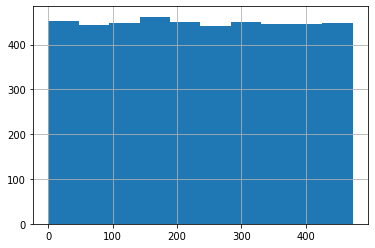

In [96]:
tkg_df["timestamp"].hist()

In [105]:
len(set(list(tkg_df["node1"].drop_duplicates()) + list(tkg_df["node2"].drop_duplicates())))

39